# Sentiment Analysis with LSTMs

In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

C:\Users\swaro\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the IMDB dataset
vocab_size = 10000  # Limit vocabulary size to the top 10,000 words
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

In [3]:
# Pad sequences to ensure equal length
max_len = 200  # Limit reviews to 200 words
X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post', truncating='post')

In [4]:
# Build the LSTM model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),  # Embedding layer
    Bidirectional(LSTM(64, return_sequences=False)),  # LSTM layer
    Dropout(0.5),  # Dropout for regularization
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=64
)

Epoch 1/5
391/391 [==============================] - 182s 441ms/step - loss: 0.4954 - accuracy: 0.7598 - val_loss: 0.4005 - val_accuracy: 0.8395
Epoch 2/5
391/391 [==============================] - 176s 451ms/step - loss: 0.2961 - accuracy: 0.8895 - val_loss: 0.3731 - val_accuracy: 0.8458
Epoch 3/5
391/391 [==============================] - 179s 457ms/step - loss: 0.2186 - accuracy: 0.9217 - val_loss: 0.4453 - val_accuracy: 0.8461
Epoch 4/5
391/391 [==============================] - 166s 425ms/step - loss: 0.1736 - accuracy: 0.9364 - val_loss: 0.4575 - val_accuracy: 0.8347
Epoch 5/5
391/391 [==============================] - 171s 438ms/step - loss: 0.1288 - accuracy: 0.9565 - val_loss: 0.5627 - val_accuracy: 0.8299


In [7]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


782/782 [==============================] - 41s 52ms/step - loss: 0.5627 - accuracy: 0.8299
Test Accuracy: 82.99%


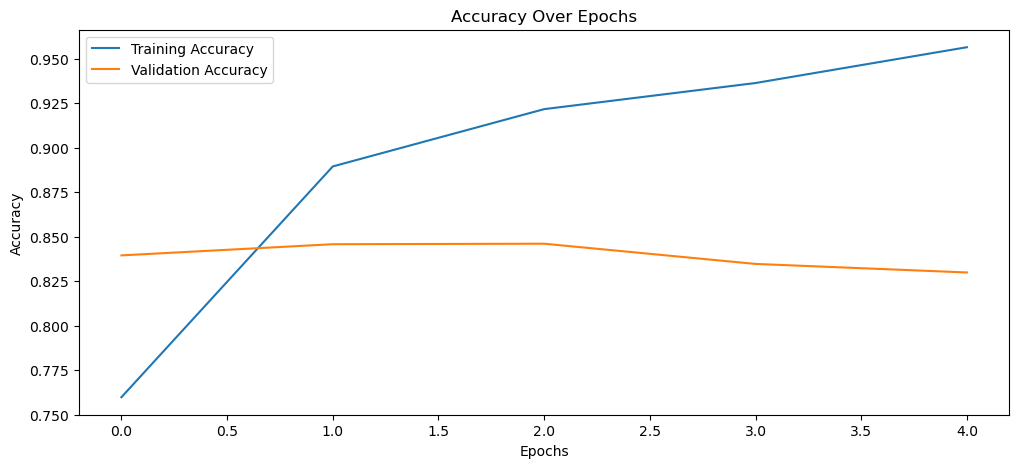

In [8]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

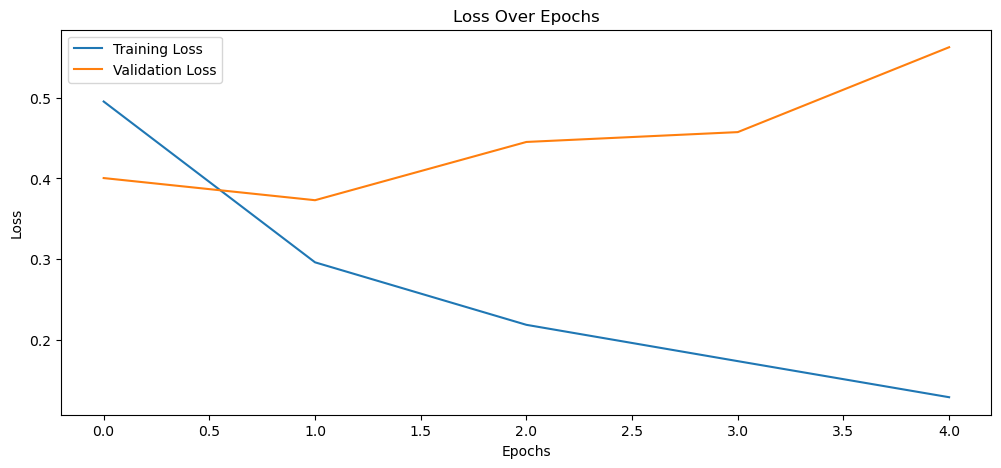

In [9]:
# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [19]:
# Test the model with a custom review
custom_review = "The movie was very boring. The script could have been better"

In [20]:
# Preprocess the custom review
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts([" ".join([str(word) for word in review]) for review in X_train])  # Fit tokenizer to training data
custom_review_seq = tokenizer.texts_to_sequences([custom_review])
custom_review_padded = pad_sequences(custom_review_seq, maxlen=max_len, padding='post', truncating='post')

In [21]:
# Predict sentiment
prediction = model.predict(custom_review_padded)
sentiment = "Positive" if prediction[0] > 0.5 else "Negative"
print(f"Predicted Sentiment: {sentiment}")

1/1 [==============================] - 0s 22ms/step
Predicted Sentiment: Negative
